In [1]:
import pickle
import matplotlib.pyplot as plt
import sys
import os
import pandas as pd

sys.path.append("../")
from utils.preprocessing import *

### predict using the model

In [4]:
import numpy as np
import joblib

# Load the features from a NumPy file
[features, scaled_features] = np.load('../processed_data/features_video_exp_16.npy', allow_pickle=True)

# Load the model using joblib
model = joblib.load('/Users/kaycei/K on Server (NoMachine)/KayCei/comprehensive_behavior_model.pkl')

# Make predictions using the loaded model
predictions = model.predict(features)



ValueError: node array from the pickle has an incompatible dtype:
- expected: {'names': ['left_child', 'right_child', 'feature', 'threshold', 'impurity', 'n_node_samples', 'weighted_n_node_samples', 'missing_go_to_left'], 'formats': ['<i8', '<i8', '<i8', '<f8', '<f8', '<i8', '<f8', 'u1'], 'offsets': [0, 8, 16, 24, 32, 40, 48, 56], 'itemsize': 64}
- got     : [('left_child', '<i8'), ('right_child', '<i8'), ('feature', '<i8'), ('threshold', '<f8'), ('impurity', '<f8'), ('n_node_samples', '<i8'), ('weighted_n_node_samples', '<f8')]

In [108]:
behavior_nonest_cats = ['torso_groom', 'investigate_0', 'unsure_0', 'wall_rear_0', 'rear_0',
                        'unsure_2', 'rear', 'investigate_1', 'investigate_2', 'right_itch',
                        'investigate_3', 'sleep_scrunch_0', 'sleep_scrunch_1', 'wall_rear_1', 'right_body_groom',
                        'face_groom_1', 'dive_scrunch', 'head_groom', 'left_orient', 'left_investigate',
                        'face_groom_2', 'left_body groom', 'left_itch_1', 'left_itch_2', 'face_groom_3',
                        'paw_groom', 'locomotion', 'right_forepaw_orient', 'right_orient']

len(behavior_nonest_cats), model.n_classes_

(29, 29)

In [109]:
behavior_nonest_cats.index('face_groom_1')

15

In [110]:
behavior_nonest_merged = [6, 7, 8, 9, 10, 14, 15, 16, 17, 18, 20, 21, 22, 25, 26, 28]
len(behavior_nonest_merged)

16

In [111]:
total_counts = {key:  [] for key in [behavior_nonest_cats[j] 
                                     for j in behavior_nonest_merged]}

for i in behavior_nonest_merged:
    total_counts[behavior_nonest_cats[i]] = len(np.where(predictions==i)[0])

In [112]:
df_counts_100ms = pd.DataFrame(total_counts, index=[0])
df_counts_100ms.to_csv('../test_behavior_counts.csv', index=None)

In [113]:
%store -r save_path
# Check if save_path is defined
if save_path:
    filename = os.path.join(save_path, 'test_behavior_counts.csv')
    df_counts_100ms.to_csv(filename, index=None)
    print(f'Saved the CSV file to {filename}')
else:
    print("Variable 'save_path' is not defined.")

Saved the CSV file to /Users/Shared/K/KayCei/HDC/AH4-KO/121423-BRIGHT FIELD/test_behavior_counts.csv


In [114]:
total_loco = len(np.where(predictions==behavior_nonest_cats.index('locomotion'))[0])
total_contra = len(np.where(predictions==behavior_nonest_cats.index('contra_orient'))[0])

ValueError: 'contra_orient' is not in list

In [115]:
comp_loco_contra = [total_loco, total_contra]
plt.bar(np.arange(len(comp_loco_contra)), comp_loco_contra)

NameError: name 'total_contra' is not defined

### place side-by-side to visualize pattern

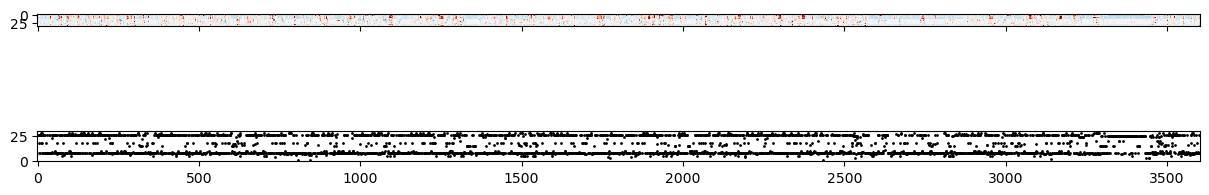

In [116]:
# plot scaled features with the corresponding predictions
fig, ax = plt.subplots(2, 1, figsize=(15, 3), gridspec_kw={'height_ratios': [6, 1]}, sharex=True)
# first 30 seconds
ax[0].imshow(scaled_features.T[:, ::10], vmin=-2, vmax=2, cmap='RdBu_r')
ax[1].scatter(np.arange(len(predictions[::10])), predictions[::10], s=1, color='k')
plt.show()

In [117]:
predictions[:50]

array([26, 18, 18,  8,  8,  8, 26,  8,  8,  8, 26, 26, 18, 26, 26, 26, 26,
       26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27,  8, 26, 18, 26, 26, 26,
       26, 26, 26, 26,  8,  8, 26, 26, 26, 28, 28, 27,  8, 26,  8,  8])

In [118]:
idx_start = np.where(np.diff(predictions)!=0)[0]+1
np.unique([predictions[id_start] for id_start in idx_start], return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 array([   1,   16,    7,   59,    7,  430,   95,  690, 4655,  454,  645,
           3,    1,    3,    3,  376,  298,   67, 1218,   11,   70,   22,
          68,  104,  100,  169, 3944,  252, 1112]))

### Save processed file

In [119]:
np.save('../processed_data/predict_video_2.npy', predictions)

In [120]:
%store -r save_path
np.save(os.path.join(save_path, 'predict_video_exp_16.npy'), predictions)

In [121]:
stim_on = 3
# in seconds, when did the animal perform behavior 2
behavior_times = np.where(predictions==stim_on)[0]/10
behavior_times

array([ 206.5,  255.4,  255.7,  316.1,  316.2,  316.3,  316.4,  316.5,
        317.1,  324.4,  324.5,  326.1,  326.2,  340.3,  340.6,  342.5,
        345.9,  456.3,  628.6,  628.7,  706.2,  836.7,  861.1,  867.1,
        867.4,  925.3,  943.5,  943.6,  943.7,  943.8,  943.9,  963.7,
       1036.3, 1496.5, 1496.6, 1508.1, 1534.7, 1544.5, 1773. , 1773.1,
       1800.4, 1826.4, 1885.8, 1987.8, 2328.3, 2410.4, 2527.4, 2528.9,
       2530.7, 2533.7, 2534. , 2535.7, 2536.4, 2617.5, 2838.2, 2838.3,
       2921.6, 3031.3, 3031.4, 3155.4, 3434.4, 3434.9, 3435. , 3435.3,
       3443.1, 3443.6, 3444. , 3444.4, 3444.8, 3445. , 3457.2, 3483.6,
       3510.7, 3571.2, 3589.1])

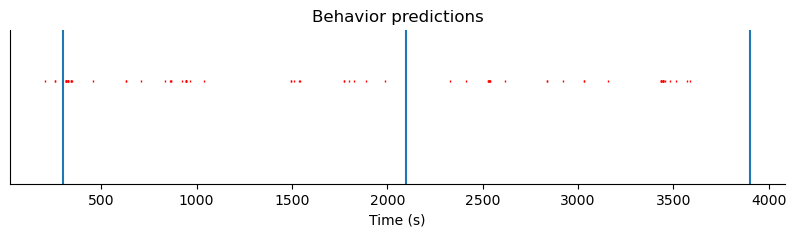

In [122]:
fig, ax = plt.subplots(1, 1, figsize=(10, 2))
# ax.plot(onset_times,
#         np.ones_like(onset_times),
#         ls='', marker='|', markersize=1, c='k', alpha=1)
ax.plot(behavior_times,
        np.ones_like(behavior_times)+0.5,
        ls='', marker='|', markersize=1, c='r', alpha=1)
ax.set_yticks([])
ax.vlines(5*60, 0.5, 2)
ax.vlines(35*60, 0.5, 2)
ax.vlines(65*60, 0.5, 2)
ax.set_ylim([0.5, 2])

# ax.set_xlim([50, 100])
ax.set_title('Behavior predictions')
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel('Time (s)')
plt.show()